In [1]:
#Importting independencies
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np 
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Loading csv with the logins
from google.colab import files
uploaded = files.upload()

Saving login.csv to login.csv


In [3]:
log = pd.read_csv('login.csv')

In [4]:
consumerKey = log['key'][0] 
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [5]:
authentificate = tweepy.OAuthHandler(consumerKey, consumerSecret)

authentificate.set_access_token(accessToken,accessTokenSecret)

api = tweepy.API(authentificate, wait_on_rate_limit = True)

In [6]:
posts_Trump = api.user_timeline(screen_name = "realDonaldTrump",count = 100, lang ="en",tweet_mode = "extended") 
i=1
print("Trump's tweets")
for tweet in posts_Trump [0:5]:
  print(str(i) + '-' + tweet.full_text + '\n')
  i = i+1

Trump's tweets
1-For years the Dems have been preaching how unsafe and rigged our elections have been. Now they are saying what a wonderful job the Trump Administration did in making 2020 the most secure election ever. Actually this is true, except for what the Democrats did. Rigged Election!

2-Alito: ‘Religious Liberty Is in Danger of Becoming a Second-Class Right‘ https://t.co/hJZJHb36PB via @BreitbartNews

3-Fitton: 2020 Election Update https://t.co/rLgZ6xWGDE via @BreitbartNews

4-These states in question should immediately be put in the Trump Win column. Biden did not win, he lost by a lot! https://t.co/ywiw6sPicI https://t.co/C1g9LZpMah

5-https://t.co/ptKv99S7qp



In [7]:
posts_Biden = api.user_timeline(screen_name = "JoeBiden",count = 100, lang ="en",tweet_mode = "extended") 
i=1
print("Biden's tweets")
for tweet in posts_Biden [0:5]:
  print(str(i) + '-' + tweet.full_text + '\n')
  i = i+1

Biden's tweets
1-I extend my deep condolences to the loved ones of the peacekeepers, including 6 American service members, who died on Tiran Island, and wish a speedy recovery to the surviving American. I join all Americans in honoring their sacrifice, as I keep their loved ones in my prayers.

2-RT @Transition46: President-elect Biden spoke this morning with His Holiness Pope Francis. https://t.co/om635SC3M9 https://t.co/DYuiiphOE0

3-Because of the Affordable Care Act:

- People with pre-existing conditions are protected
- More than 20 million Americans gained coverage
- Nearly 12 million seniors have had their prescription drug costs reduced

Now more than ever, we have to protect and build on it. https://t.co/Vl5yliyUFm

4-Ron Klain’s deep, varied experience and capacity to work with people all across the political spectrum is precisely what I need in a White House chief of staff as we confront this moment of crisis and bring our country together again. https://t.co/s4XlAgMrxf

5-T

In [8]:
df_Trump = pd.DataFrame( [tweet.full_text for tweet in posts_Trump], columns = ['Tweets'])
df_Trump.head()

,Tweets
0,For years the Dems have been preaching how uns...
1,Alito: ‘Religious Liberty Is in Danger of Beco...
2,Fitton: 2020 Election Update https://t.co/rLgZ...
3,These states in question should immediately be...
4,https://t.co/ptKv99S7qp


In [9]:
df_Biden = pd.DataFrame( [tweet.full_text for tweet in posts_Biden], columns = ['Tweets'])
df_Biden.head()

,Tweets
0,I extend my deep condolences to the loved ones...
1,RT @Transition46: President-elect Biden spoke ...
2,Because of the Affordable Care Act:\n\n- Peopl...
3,"Ron Klain’s deep, varied experience and capaci..."
4,"This Veterans Day, I feel the full weight of t..."


In [10]:
#Cleaning the tweets from any @ or # or Links
def clean(text):
  text = re.sub(r'@[A-Za-z0-9]+', '',text)
  text = re.sub(r'#', '',text)
  text = re.sub(r'RT[\s]+', '',text)
  text = re.sub(r'https?:/\/\S+', '',text)

  return text

df_Trump['Tweets'] = df_Trump['Tweets'].apply(clean)
df_Biden['Tweets'] = df_Biden['Tweets'].apply(clean)


In [11]:
#Get the subjectivity and Polarity of each tweet thanks to TextBlob
def getSubjectivity(text): 
  return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df_Trump['Subjectivity'] = df_Trump['Tweets'].apply(getSubjectivity)
df_Trump['Polarity'] = df_Trump['Tweets'].apply(getPolarity)

df_Biden['Subjectivity'] = df_Biden['Tweets'].apply(getSubjectivity)
df_Biden['Polarity'] = df_Biden['Tweets'].apply(getPolarity)

df_Trump

,Tweets,Subjectivity,Polarity
0,For years the Dems have been preaching how uns...,0.570000,0.467500
1,Alito: ‘Religious Liberty Is in Danger of Beco...,0.545238,0.245238
2,Fitton: 2020 Election Update via,0.000000,0.000000
3,These states in question should immediately be...,0.400000,0.150000
4,,0.000000,0.000000
...,...,...,...
95,Pennsylvania Party Leadership votes are this w...,0.680952,0.236243
96,"Nate Simington, a very smart and qualified ind...",0.583929,0.297768
97,Happy 245th Birthday to the ! HappyBirthdayMar...,1.000000,1.000000
98,"Republicans, don’t let Andrew McCabe continue ...",0.550000,-0.500000


In [12]:
df_Biden

,Tweets,Subjectivity,Polarity
0,I extend my deep condolences to the loved ones...,0.400000,0.280000
1,: President-elect Biden spoke this morning wit...,0.000000,0.000000
2,Because of the Affordable Care Act:\n\n- Peopl...,0.466667,0.366667
3,"Ron Klain’s deep, varied experience and capaci...",0.325000,0.100000
4,"This Veterans Day, I feel the full weight of t...",0.183333,0.116667
...,...,...,...
95,This is our moment to choose:\n\nHope over fea...,0.000000,0.000000
96,Votar es tu derecho. Si tienes alguna pregunta...,0.000000,0.000000
97,Every moment of the last four years comes down...,0.177778,-0.077778
98,"Let’s make history, .",0.000000,0.000000


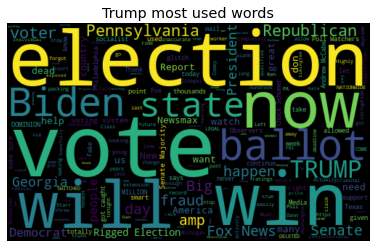

In [13]:
#Plotting most used words of each candidate
allWords_Trump = ' '.join( [twts for twts in df_Trump['Tweets']])
wordCloud_Trump = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords_Trump)

allWords_Biden = ' '.join( [twts for twts in df_Biden['Tweets']])
wordCloud_Biden = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords_Biden)


plt.imshow(wordCloud_Trump, interpolation = 'bilinear')
plt.title('Trump most used words')
plt.axis('off')
plt.show()

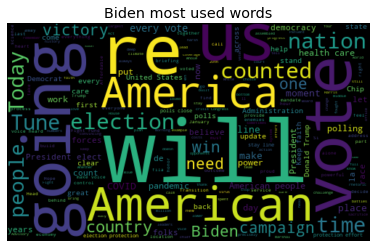

In [14]:
plt.imshow(wordCloud_Biden, interpolation = 'bilinear')
plt.title('Biden most used words')
plt.axis('off')
plt.show()

In [15]:
#Adding a column for the analysis of the tweets
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df_Trump['Analysis']=df_Trump['Polarity'].apply(getAnalysis)
df_Biden['Analysis']=df_Biden['Polarity'].apply(getAnalysis)

df_Trump

,Tweets,Subjectivity,Polarity,Analysis
0,For years the Dems have been preaching how uns...,0.570000,0.467500,Positive
1,Alito: ‘Religious Liberty Is in Danger of Beco...,0.545238,0.245238,Positive
2,Fitton: 2020 Election Update via,0.000000,0.000000,Neutral
3,These states in question should immediately be...,0.400000,0.150000,Positive
4,,0.000000,0.000000,Neutral
...,...,...,...,...
95,Pennsylvania Party Leadership votes are this w...,0.680952,0.236243,Positive
96,"Nate Simington, a very smart and qualified ind...",0.583929,0.297768,Positive
97,Happy 245th Birthday to the ! HappyBirthdayMar...,1.000000,1.000000,Positive
98,"Republicans, don’t let Andrew McCabe continue ...",0.550000,-0.500000,Negative


In [16]:
df_Biden

,Tweets,Subjectivity,Polarity,Analysis
0,I extend my deep condolences to the loved ones...,0.400000,0.280000,Positive
1,: President-elect Biden spoke this morning wit...,0.000000,0.000000,Neutral
2,Because of the Affordable Care Act:\n\n- Peopl...,0.466667,0.366667,Positive
3,"Ron Klain’s deep, varied experience and capaci...",0.325000,0.100000,Positive
4,"This Veterans Day, I feel the full weight of t...",0.183333,0.116667,Positive
...,...,...,...,...
95,This is our moment to choose:\n\nHope over fea...,0.000000,0.000000,Neutral
96,Votar es tu derecho. Si tienes alguna pregunta...,0.000000,0.000000,Neutral
97,Every moment of the last four years comes down...,0.177778,-0.077778,Negative
98,"Let’s make history, .",0.000000,0.000000,Neutral


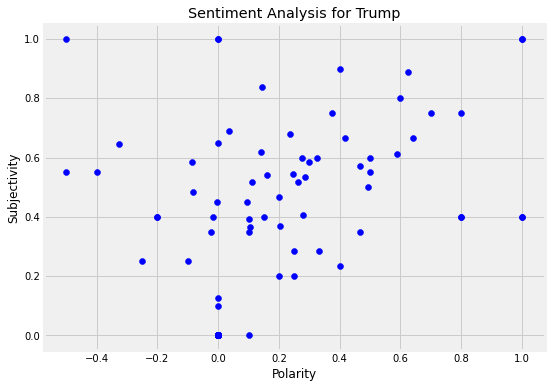

In [18]:
#plotting the analysis of each candidate's tweet
plt.figure(figsize=(8,6))
for i in range(0, df_Trump.shape[0]):
  plt.scatter(df_Trump['Polarity'][i],df_Trump['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis for Trump')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

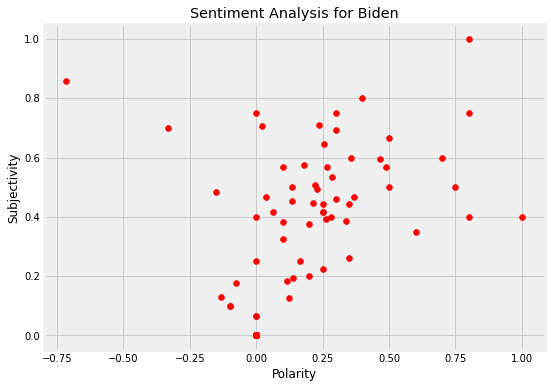

In [20]:
plt.figure(figsize=(8,6))
for i in range(0, df_Biden.shape[0]):
  plt.scatter(df_Biden['Polarity'][i],df_Biden['Subjectivity'][i], color='red')

plt.title('Sentiment Analysis for Biden')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [21]:
ptweets_Trump = df_Trump[df_Trump.Analysis =='Positive']
ptweets_Trump= ptweets_Trump['Tweets']
ntweets_Trump= df_Trump[df_Trump.Analysis =='Negative']
ntweets_Trump = ntweets_Trump['Tweets']

ptweets_Trump
#ntweets_Trump


0     For years the Dems have been preaching how uns...
1     Alito: ‘Religious Liberty Is in Danger of Beco...
3     These states in question should immediately be...
5     Must see  takedown of the horrible, inaccurate...
8     . daytime ratings have completely collapsed. W...
10          :   Newsmax and Oann are great alternatives
11    :   Quite right. They've been a disaster since...
12    :   Hey old Fox News lovers... go to Newsmax.....
15    _Stout:   I’ve been a loyal FOX viewer for man...
19    : this brilliant point underlies the driving f...
20    : What is amazing is how obvious the cheating ...
22    : WE ARE MAKING BIG PROGRESS. RESULTS STATO CO...
26                                       So beautiful! 
27                       Rigged Election! Thanks Ryan. 
30    “OK, I’ve seen enough. What’s going to happen ...
31    From 200,000 votes to less than 10,000 votes. ...
32                            Big Jim is the greatest! 
33    It took long enough! What is taking North 

In [22]:
ptweets_Biden= df_Biden[df_Biden.Analysis =='Positive']
ptweets_Biden= ptweets_Biden['Tweets']
ntweets_Biden= df_Biden[df_Biden.Analysis =='Negative']
ntweets_Biden = ntweets_Biden['Tweets']

ptweets_Biden
#ntweets_Biden

0     I extend my deep condolences to the loved ones...
2     Because of the Affordable Care Act:\n\n- Peopl...
3     Ron Klain’s deep, varied experience and capaci...
4     This Veterans Day, I feel the full weight of t...
5     Today, we honor the service of those who have ...
6     We are going to build a health care system tha...
9     Come January, we will work quickly with Congre...
11    Tune in as my campaign provides a post-electio...
14    . and I aren’t wasting any time. We’re ready t...
18    The challenge before us right now is still imm...
19    My COVID-19 Transition Advisory Board will adv...
26    With full hearts and steady hands, with faith ...
27    Tonight, the whole world is watching America. ...
30    Now that the campaign is over—what is the peop...
31    We cannot repair the economy, restore our vita...
34    To all those who volunteered, worked the polls...
35    For America’s educators, this is a great day: ...
36    I pledge to be a President who seeks not t

In [23]:
# Percentage of positive/negative tweets for each candidate
Positive_Trump = round((ptweets_Trump.shape[0]/df_Trump.shape[0])*100,1)
Negative_Trump = round((ntweets_Trump.shape[0]/df_Trump.shape[0])*100,1)

Positive_Biden = round((ptweets_Biden.shape[0]/df_Biden.shape[0])*100,1)
Negative_Biden = round((ntweets_Biden.shape[0]/df_Biden.shape[0])*100,1)


print(Positive_Trump ,"% of Trump's tweets are positive")
print(Negative_Trump ,"% of Trump's tweets are negative")
print(Positive_Biden ,"% of Biden's tweets are positive")
print(Negative_Biden ,"% of Biden's tweets are negative")


46.0 % of Trump's tweets are positive
13.0 % of Trump's tweets are negative
48.0 % of Biden's tweets are positive
7.0 % of Biden's tweets are negative


<function matplotlib.pyplot.show>

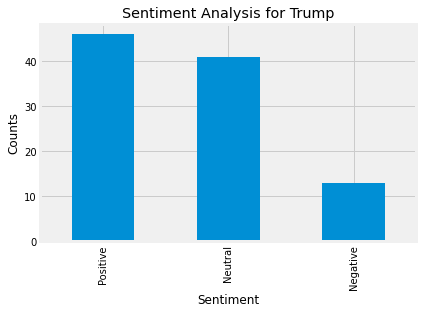

In [24]:
plt.title('Sentiment Analysis for Trump')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_Trump['Analysis'].value_counts().plot(kind='bar')
plt.show

<function matplotlib.pyplot.show>

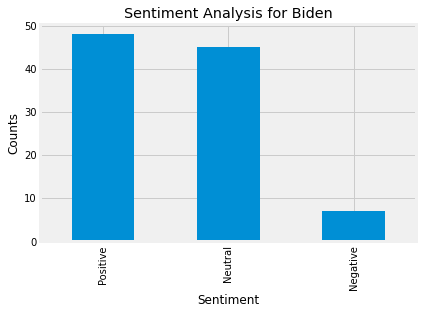

In [25]:
plt.title('Sentiment Analysis for Biden')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_Biden['Analysis'].value_counts().plot(kind='bar')
plt.show